In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
def _normaliza(x):
    "traslada a [0,1] los valores de x"
    x = np.array(x)
    minx, maxx = np.min(x), np.max(x)
    return (x-minx) / (maxx-minx)

def jcaos(A, y, marcador):
    "A=vértices a elegir, y=arreglo de índices para esos vértices"
    B = A[y,:] # selecciona los vértices
    # crea una ufunc que calcula el promedio de dos valores (en este caso, puntos 2D)
    prom = np.frompyfunc(lambda x,y:(x+y)/2, 2, 1)
    # Calcula el prom acumulado
    C = prom.accumulate(B, dtype=np.object).astype(np.float)
    x,y = C.T # separa en arreglos ambas coord.
    plt.figure(figsize=(12,12)) # tamaño ampliado
    plt.plot(x,y, marcador, alpha=0.5)
    
def tercios(x, marcador=",", normaliza=True):
    "x=serie de tiempo, marcador in [,.ox^-], normaliza==False ssi x[i] in [0,1]"
    if normaliza:
        x=_normaliza(x)
    # clasifica x por sus valores creando arreglos booleanos
    #a = x<1/3
    b = (x>=1/3) & (x<2/3)
    c = x>=2/3
    # crea arreglo de 0s, 1s y 2s como índices para seleccionar vértices
    y = np.zeros_like(x, dtype=np.int8) # selecciona por default vértice con índice 0
    y[b]=1 # si cumple b, selecciona vértice con índice 1
    y[c]=2 # si cumple c, selecciona vértice con índice 2
    # vértices del triángulo
    A = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
    jcaos(A, y, marcador)

%config InlineBackend.figure_format = 'retina'

In [224]:
# generar una sucesión que se sepa caótica y ver como sale el juego del caos con ella

# logística
r=4
iteraciones = 1000
def itera(iteraciones, r, xinicial, cuantos_valores):
    evalua = np.frompyfunc(lambda x, y: r*x-r*x*x, 2, 1)
    C = evalua.accumulate(np.full((iteraciones,), xinicial), dtype=np.object).astype(np.float)
    return C[-cuantos_valores:]

x0 = itera(100000, 4, 0.3, 1)[0]
xlog = itera(1000000, 4, x0, 1000000)

CPU times: user 603 ms, sys: 59.1 ms, total: 662 ms
Wall time: 662 ms


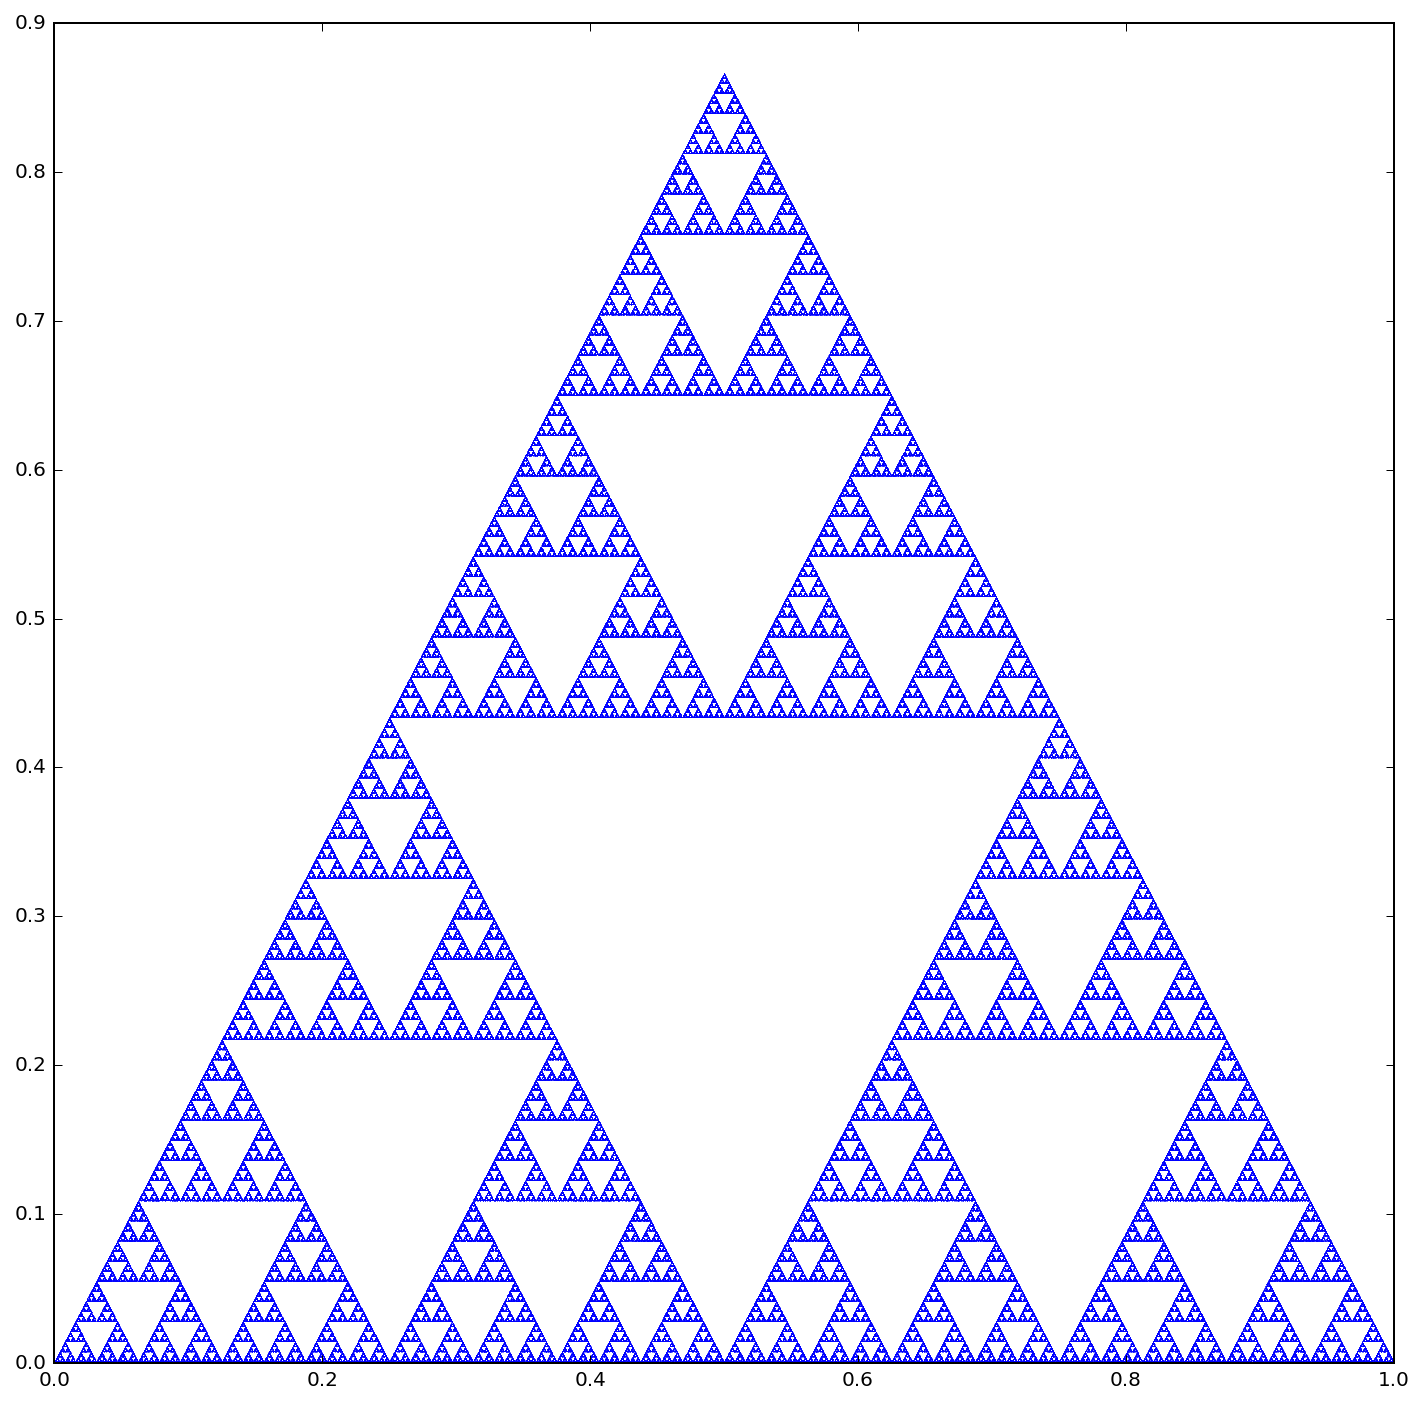

In [231]:
xu = np.random.rand(1000000)  # aleatorios distr uniforme
xn = np.random.randn(1000000) # aleatorios distr normal
x_lig = pd.read_csv("pach/Serie_ligeros.txt", header=None)[0]
x_pes = pd.read_csv("pach/Serie_pesados.txt", header=None)[0]



%time tercios(xu)
#tercios(xn)
#tercios(x_lig, marcador="x")
#tercios(x_lig, marcador='^')

In [4]:
def cuartos(x, marcador=",", normaliza=True):
    "x=serie de tiempo, marcador in [,.ox^-], normaliza==False ssi x[i] in [0,1]"
    if normaliza:
        x=_normaliza(x)
    # clasifica x por sus valores creando arreglos booleanos
    b = (x>=1/4) & (x<2/4)
    c = (x>=2/4) & (x<3/4)
    d = x>=3/4
    # crea arreglo de 0s, 1s, 2s, 3s como índices para seleccionar vértices
    y = np.zeros_like(x, dtype=np.int8) # selecciona por default vértice con índice 0
    y[b]=1 # si cumple b, selecciona vértice con índice 1
    y[c]=2 # si cumple c, selecciona vértice con índice 2
    y[d]=3
    # vértices del triángulo
    A = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
    jcaos(A, y, marcador)

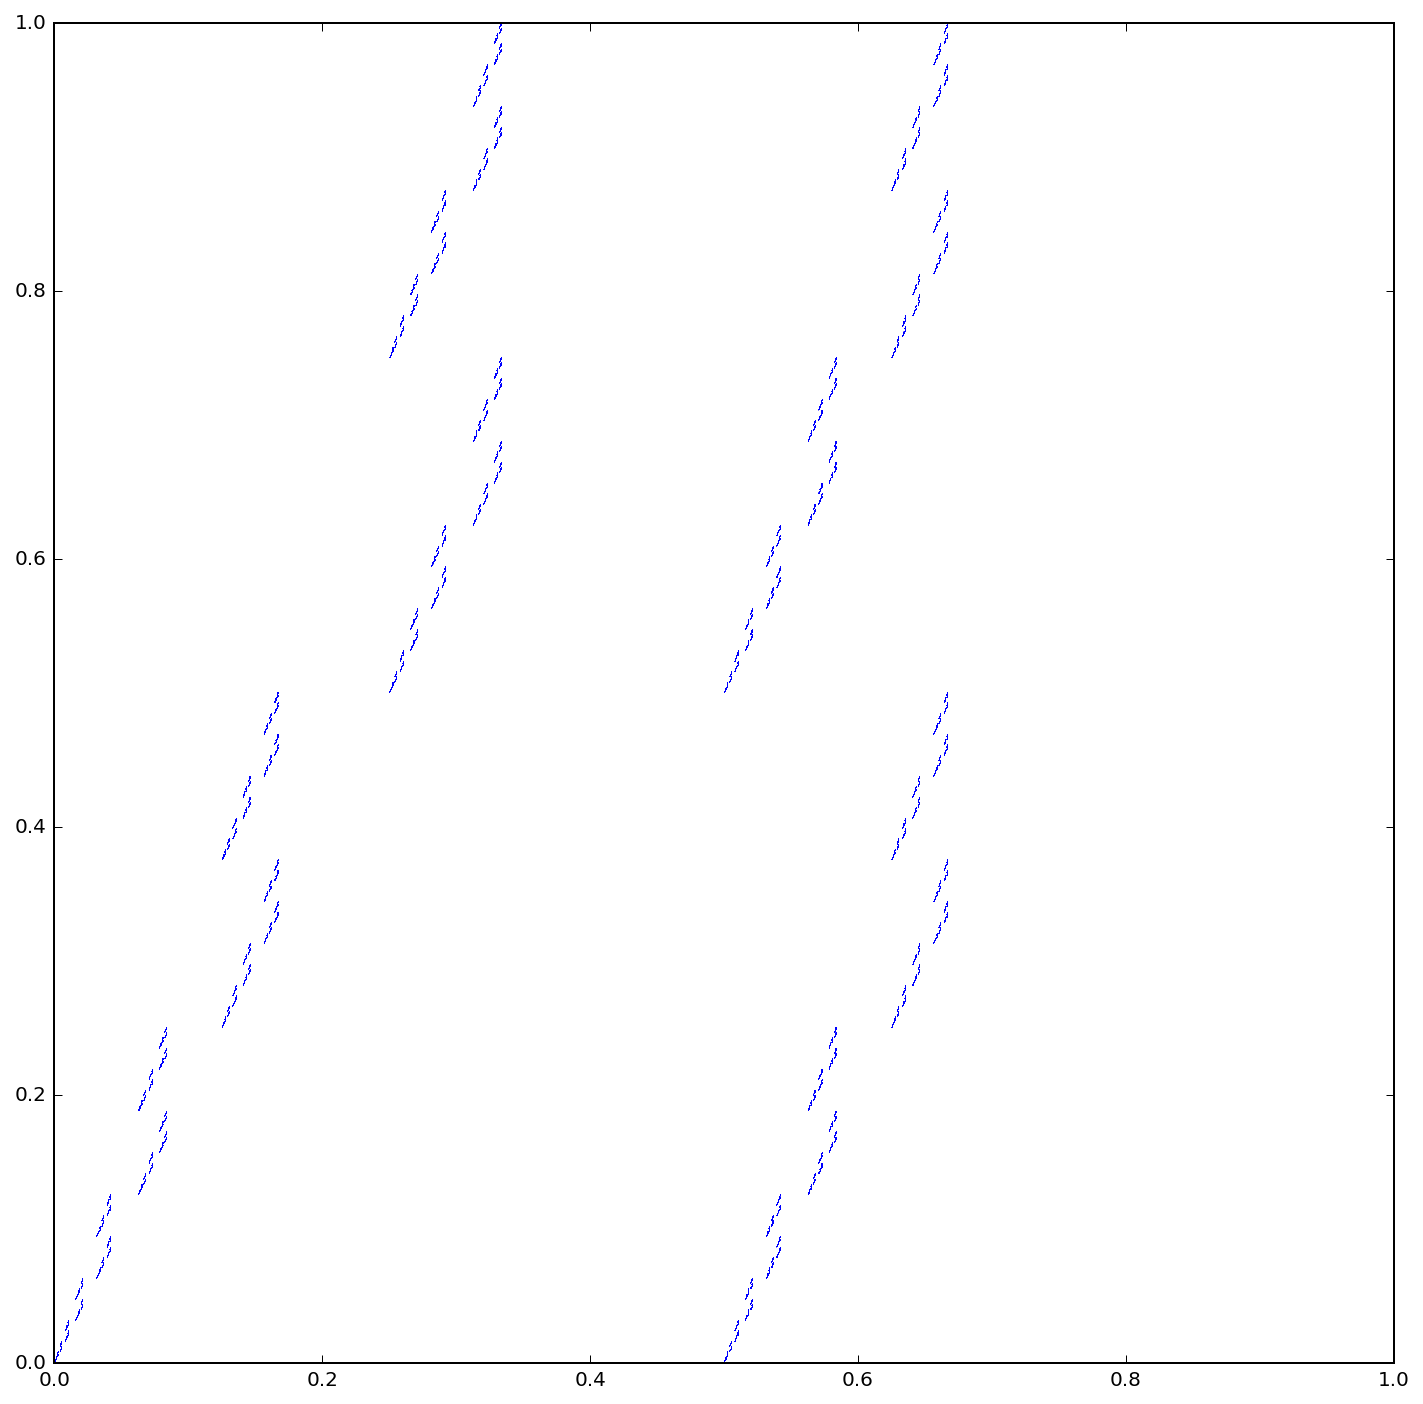

In [104]:
cuartos(xlog)
#cuartos(xn)
#cuartos(x_lig, marcador="^")
#cuartos(x_pes, marcador="^")

In [171]:
def rot(ary, theta):
    "rota ary theta grados antihorario."
    theta = np.radians(theta)
    c, s = np.cos(theta), np.sin(theta) 
    R = np.matrix([[c, -s], [s, c]])
    return np.array(np.matmul(R,ary))

def eneagono(x, n=5, marcador=",", normaliza=True):
    """Juego del Caos para serie de tiempo x sobre un n-ágono.

    Parámetros:
        x -- serie de tiempo
        n -- número de vértices (default 5)
        marcador -- in [,.ox^-] (default ',')
        normaliza -- False ssi x[i] in [0,1] (default True)
    """
    if normaliza:
        x=_normaliza(x)
    # clasifica x por sus valores creando arreglos booleanos
    booleanos=[0]
    for i in range(1,n-1):
        booleanos.append((x>=i/n) & (x<(i+1)/n))
    booleanos.append(x>(n-1)/n)
    # crea arreglo de 0s, 1s, 2s, 3s como índices para seleccionar vértices
    y = np.zeros_like(x, dtype=np.int8) # selecciona por default vértice con índice 0
    for i in range(1,n):
        y[booleanos[i]]=i
    # 1er vértice del n-agono
    A = np.array([[-np.sin(np.pi/n),-np.cos(np.pi/n)]])
    for _ in range(n-1): # los demás vértices
        A = np.append(A, rot(A[-1], 360/n), axis=0)
    jcaos(A, y, marcador)
    
%config InlineBackend.figure_format = 'retina'

(1, 2)
[[  1.00000000e+00  -6.12323400e-17]
 [  1.00000000e+00  -6.12323400e-17]
 [ -1.00000000e+00  -6.12323400e-17]
 ..., 
 [ -1.00000000e+00  -6.12323400e-17]
 [  1.00000000e+00  -6.12323400e-17]
 [  1.00000000e+00  -6.12323400e-17]]
CPU times: user 610 ms, sys: 65.5 ms, total: 675 ms
Wall time: 673 ms


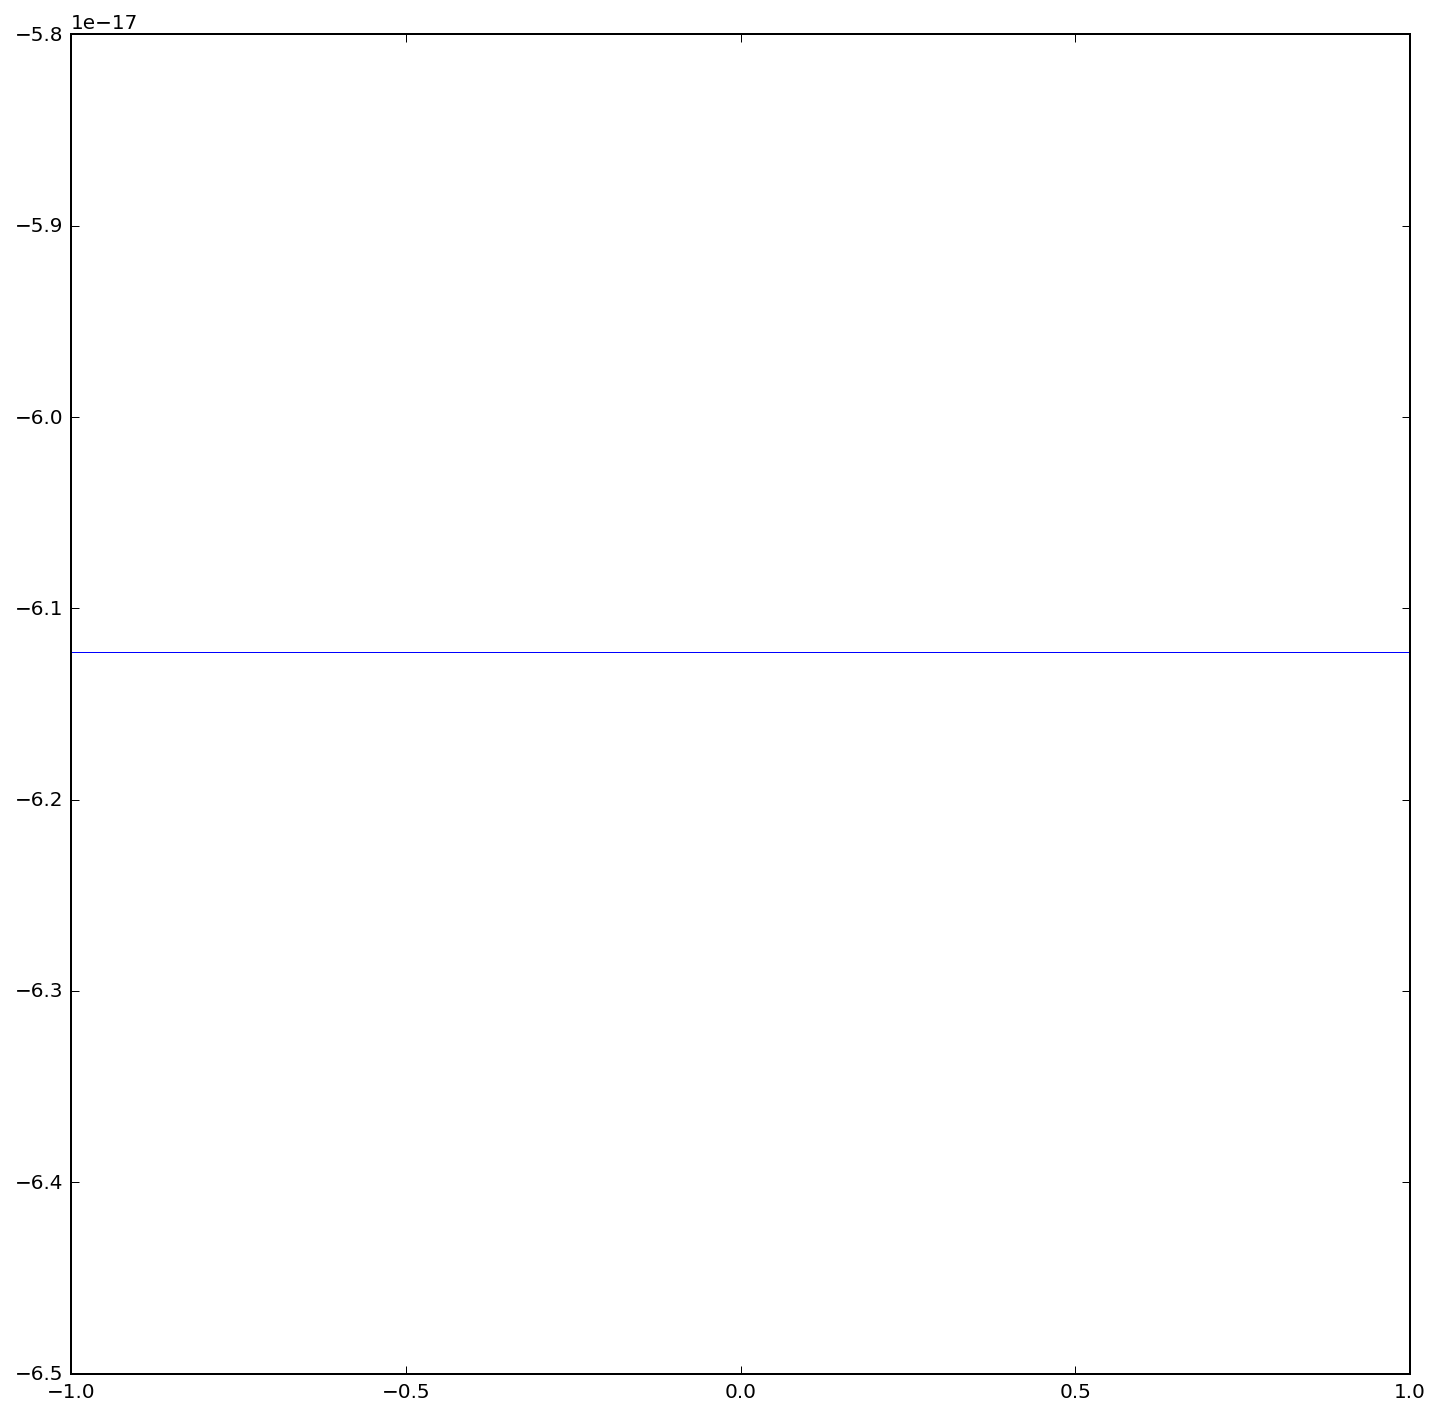

In [170]:
#eneagono(x_pes, n=3000)
#eneagono(xlog, n=120)
%time eneagono(xlog, n=24200)

In [118]:
%store xlog

Stored 'xlog' (ndarray)


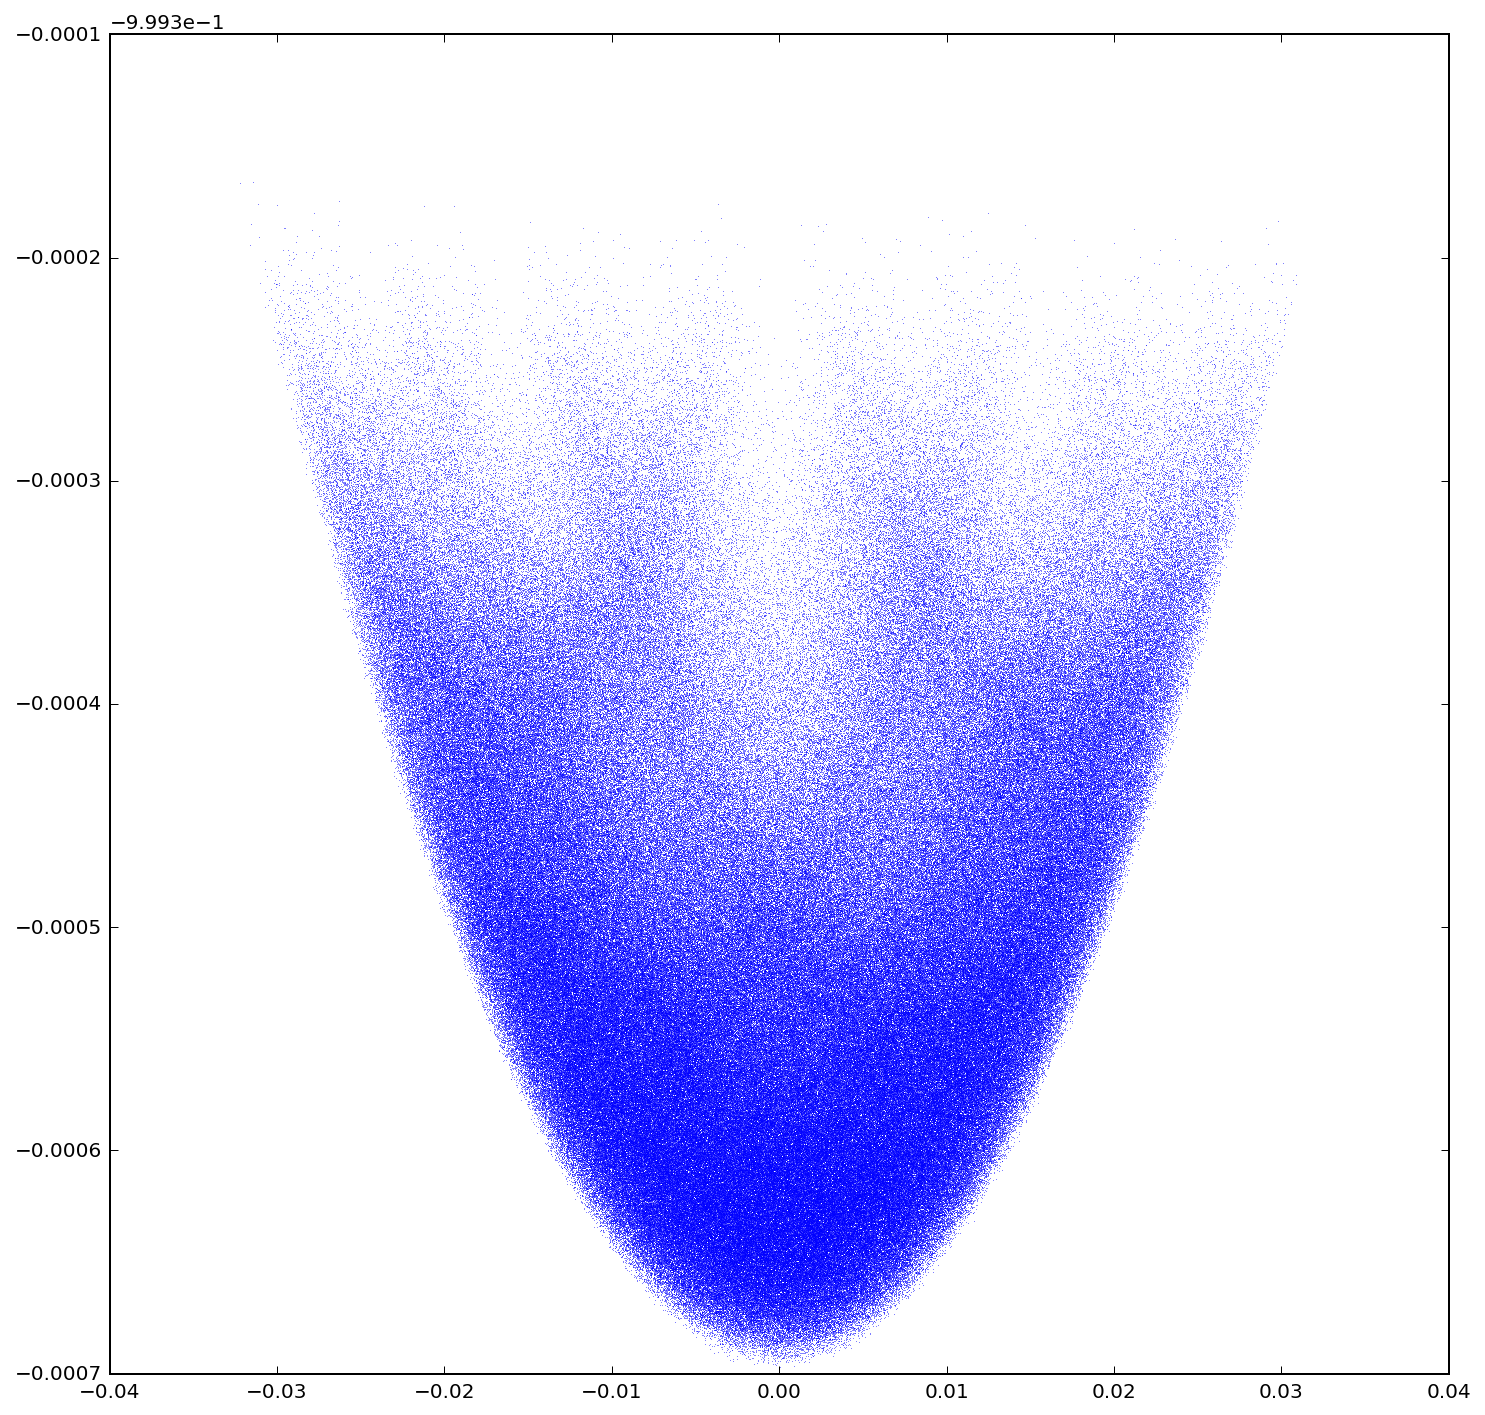

In [121]:
#eneagono(x_lig , n=9000)
eneagono(xu, n=24000)

In [236]:
def eneagono1(x, n=5, marcador=",", normaliza=True):
    """Juego del Caos para serie de tiempo x sobre un n-ágono.

    Parámetros:
        x -- serie de tiempo
        n -- número de vértices (default 5)
        marcador -- in [,.ox^-] (default ',')
        normaliza -- False ssi x[i] in [0,1] (default True)
    """
    if normaliza:
        x=_normaliza(x)
    # crea arreglo de 0s, 1s, 2s, 3s como índices para seleccionar vértices
    y = (x*n).astype(np.int8)
    y[y==n]=n-1
    # rotaciones
    A = np.array([[-np.sin(np.pi/n),-np.cos(np.pi/n)]])
    for _ in range(n-1): # los demás vértices
        A = np.append(A, rot(A[-1], 360/n), axis=0)
    jcaos(A, y, marcador)

CPU times: user 1.68 s, sys: 147 ms, total: 1.83 s
Wall time: 1.83 s


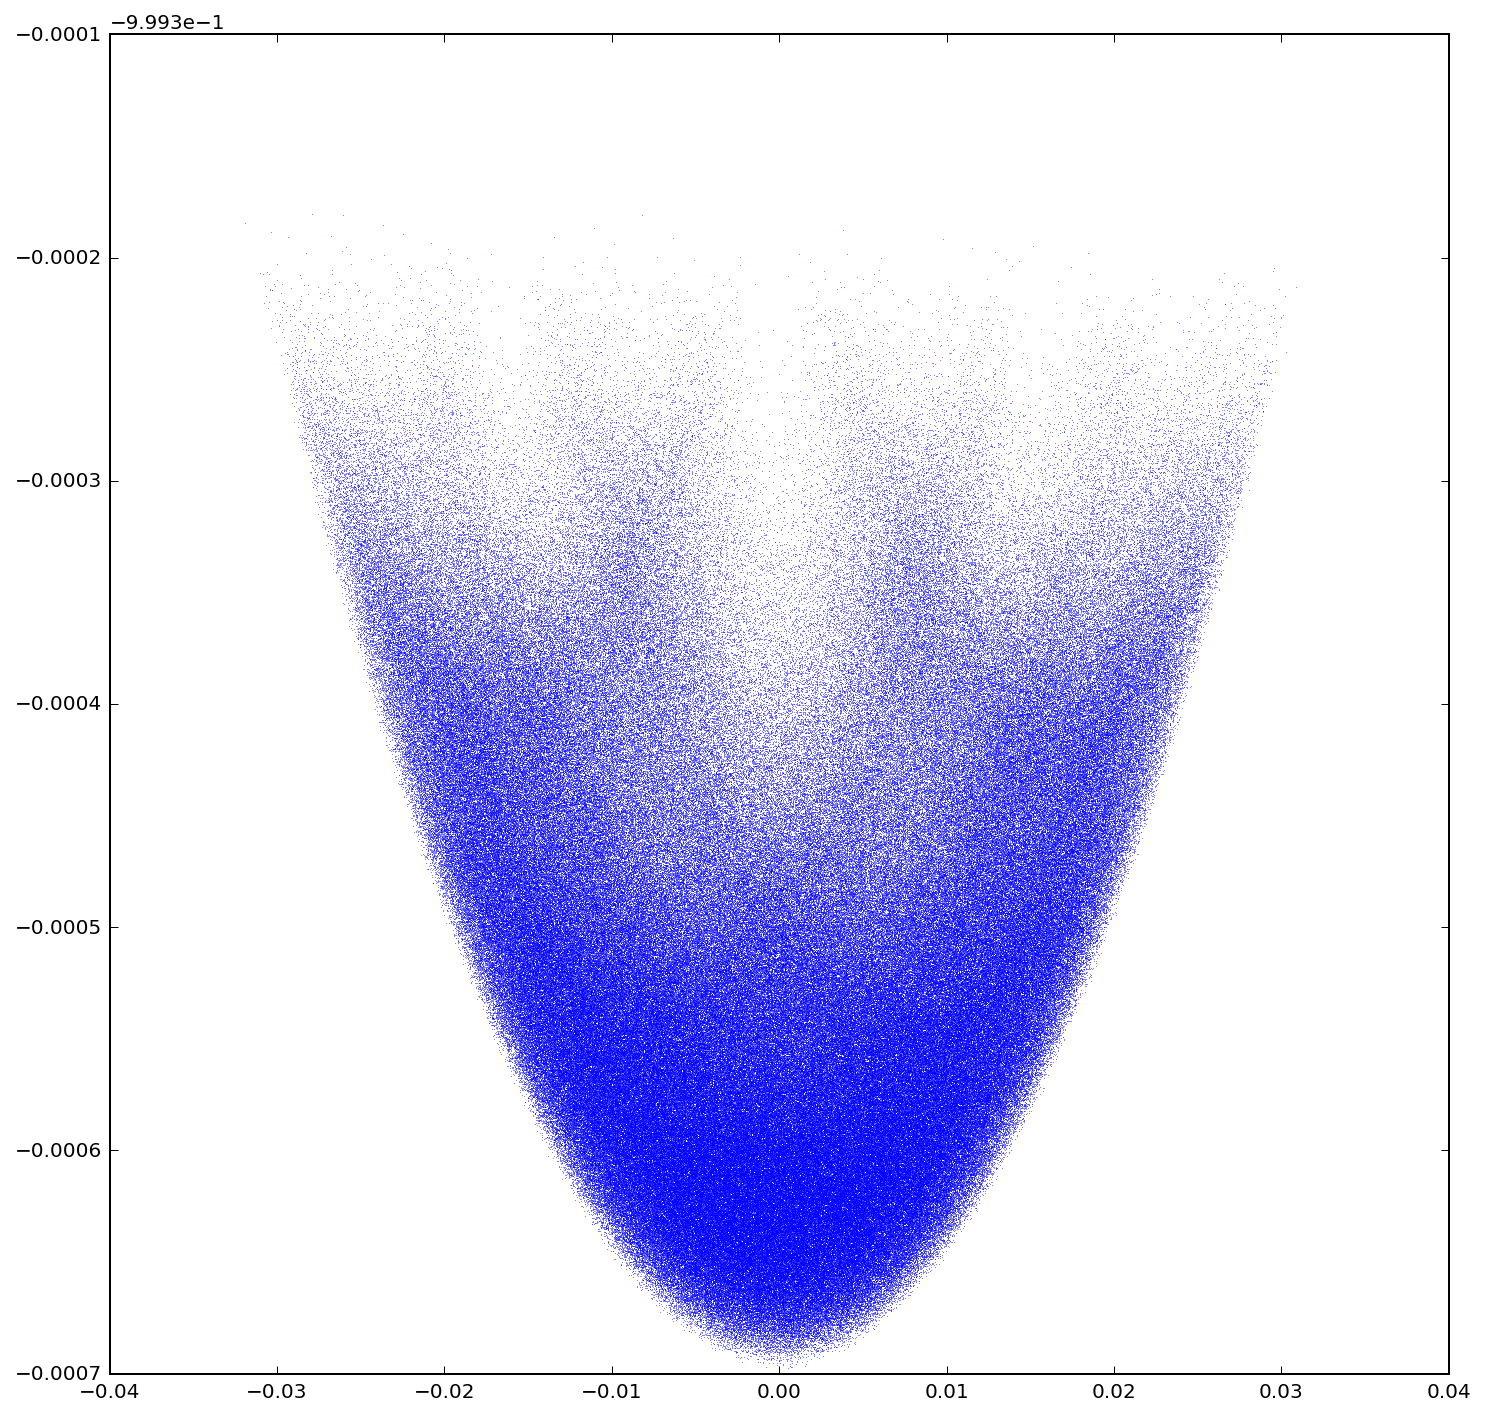

In [238]:
%time eneagono1(xu, n=24200)